# 讀取資料

In [1]:
import nba_api
id=1610612747
import pandas as pd 
#調用函數“ League Game Finder”在nba 套件中進行API stats.endpoints 
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
games = gamefinder.get_data_frames()[0] # [0] 抓取到的資料從list 改為 dataframe
print(games.shape)
games

(3582, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612747,LAL,Los Angeles Lakers,0022000146,2021-01-10,LAL @ HOU,None,83,38,...,0.750,1,14,15,11,7,4,6,7,5.2
1,22020,1610612747,LAL,Los Angeles Lakers,0022000131,2021-01-08,LAL vs. CHI,W,240,117,...,0.852,10,32,42,21,3,8,15,15,0.6
2,22020,1610612747,LAL,Los Angeles Lakers,0022000121,2021-01-07,LAL vs. SAS,L,240,109,...,0.619,9,39,48,21,2,4,13,20,-4.2
3,22020,1610612747,LAL,Los Angeles Lakers,0022000103,2021-01-05,LAL @ MEM,W,239,94,...,0.818,9,43,52,24,7,8,17,14,2.2
4,22020,1610612747,LAL,Los Angeles Lakers,0022000087,2021-01-03,LAL @ MEM,W,239,108,...,0.737,12,37,49,24,9,5,10,15,8.8
5,22020,1610612747,LAL,Los Angeles Lakers,0022000075,2021-01-01,LAL @ SAS,W,239,109,...,0.813,16,42,58,27,8,7,13,20,6.0
6,22020,1610612747,LAL,Los Angeles Lakers,0022000060,2020-12-30,LAL @ SAS,W,239,121,...,0.750,7,40,47,25,4,3,17,24,14.0
7,22020,1610612747,LAL,Los Angeles Lakers,0022000045,2020-12-28,LAL vs. POR,L,240,107,...,0.833,6,35,41,20,6,5,14,14,-8.0
8,22020,1610612747,LAL,Los Angeles Lakers,0022000040,2020-12-27,LAL vs. MIN,W,242,127,...,0.778,5,41,46,32,6,14,17,19,36.0
9,22020,1610612747,LAL,Los Angeles Lakers,0022000008,2020-12-25,LAL vs. DAL,W,237,138,...,0.708,17,36,53,33,9,4,16,23,23.8


# 數據探索可視化

In [2]:
print(games['SEASON_ID'].unique())

['22020' '12020' '42019' '22019' '12019' '22018' '12018' '22017' '12017'
 '22016' '12016' '22015' '12015' '22014' '12014' '22013' '12013' '42012'
 '22012' '12012' '42011' '22011' '12011' '42010' '22010' '12010' '42009'
 '22009' '12009' '42008' '22008' '12008' '42007' '22007' '12007' '42006'
 '22006' '12006' '42005' '22005' '12005' '22004' '12004' '42003' '22003'
 '42002' '22002' '42001' '22001' '42000' '22000' '41999' '21999' '41998'
 '21998' '41997' '21997' '41996' '21996' '41995' '21995' '41994' '21994'
 '21993' '41992' '21992' '41991' '21991' '41990' '21990' '41989' '21989'
 '41988' '21988' '41987' '21987' '41986' '21986' '41985' '21985' '41984'
 '21984' '41983' '21983']


In [3]:
games.dtypes

SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_NAME             object
GAME_ID               object
GAME_DATE             object
MATCHUP               object
WL                    object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
dtype: object

In [4]:
#去掉遺失值
games = games[games.PTS != 0]
games = games.dropna()
# 定義一個新的欄位 season
games['season']= games.SEASON_ID.str[0].astype(int)
# 定義一個新的欄位 Home
games['Home'] = games.MATCHUP.str.len() > 10
# 定義一個新的欄位 Player 
games['Player'] = games.MATCHUP.str.rsplit(' ').str[-1]

games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
1,22020,1610612747,LAL,Los Angeles Lakers,0022000131,2021-01-08,LAL vs. CHI,W,240,117,...,42,21,3,8,15,15,0.6,2,True,CHI
2,22020,1610612747,LAL,Los Angeles Lakers,0022000121,2021-01-07,LAL vs. SAS,L,240,109,...,48,21,2,4,13,20,-4.2,2,True,SAS
3,22020,1610612747,LAL,Los Angeles Lakers,0022000103,2021-01-05,LAL @ MEM,W,239,94,...,52,24,7,8,17,14,2.2,2,False,MEM
4,22020,1610612747,LAL,Los Angeles Lakers,0022000087,2021-01-03,LAL @ MEM,W,239,108,...,49,24,9,5,10,15,8.8,2,False,MEM
5,22020,1610612747,LAL,Los Angeles Lakers,0022000075,2021-01-01,LAL @ SAS,W,239,109,...,58,27,8,7,13,20,6.0,2,False,SAS
6,22020,1610612747,LAL,Los Angeles Lakers,0022000060,2020-12-30,LAL @ SAS,W,239,121,...,47,25,4,3,17,24,14.0,2,False,SAS
7,22020,1610612747,LAL,Los Angeles Lakers,0022000045,2020-12-28,LAL vs. POR,L,240,107,...,41,20,6,5,14,14,-8.0,2,True,POR
8,22020,1610612747,LAL,Los Angeles Lakers,0022000040,2020-12-27,LAL vs. MIN,W,242,127,...,46,32,6,14,17,19,36.0,2,True,MIN
9,22020,1610612747,LAL,Los Angeles Lakers,0022000008,2020-12-25,LAL vs. DAL,W,237,138,...,53,33,9,4,16,23,23.8,2,True,DAL
10,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,109,...,45,22,4,2,19,20,-7.6,2,True,LAC


In [5]:
train = games[games['SEASON_ID']!= '22020' '12020' '22019' '12019' '12018' '12017' '12016' '12015' '12014' '12013' '42012'
              '12012' '12012' '42011' '12011' '42010'  '12010' '42009''12009' '42008'  '12008' '42007'  '12007' '42006'
              '12006' '42005' '12005'  '12004' '42003'  '42002''42001'  '42000''41999'  '41998''41997'  '41996'  '41995' 
              '41994' '41992'  '41991'  '41990'  '41989' '41988'  '41987'  '41986'  '41985'  '41984''41983' ]
test = games[games['SEASON_ID']== '22019']



In [6]:
train.corr()

,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home
TEAM_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIN,NaN,1.000000,0.292697,0.274200,0.376488,0.034293,0.044531,0.044887,0.022540,0.089083,...,0.198908,0.231681,0.206313,0.063688,0.080429,-0.016966,0.024929,0.019966,-0.007459,-0.036425
PTS,NaN,0.292697,1.000000,0.851052,0.398115,0.695120,0.486513,0.267270,0.416442,0.274447,...,0.231039,0.200418,0.618218,0.143379,0.098894,-0.063164,0.033270,0.523898,-0.052357,0.109710
FGM,NaN,0.274200,0.851052,1.000000,0.555777,0.742971,0.339479,0.172451,0.300790,-0.208701,...,0.208398,0.197851,0.667721,0.125681,0.077175,-0.107889,-0.060068,0.466555,-0.047218,0.085463
FGA,NaN,0.376488,0.398115,0.555777,1.000000,-0.136838,0.223198,0.373696,-0.083803,-0.286228,...,0.199238,0.443445,0.279762,0.151281,0.019049,-0.254925,-0.026448,-0.003348,-0.089173,0.021556
FG_PCT,NaN,0.034293,0.695120,0.742971,-0.136838,1.000000,0.223439,-0.096018,0.429449,-0.012351,...,0.091848,-0.113979,0.570957,0.030296,0.078270,0.077349,-0.051082,0.556606,0.016268,0.083392
FG3M,NaN,0.044531,0.486513,0.339479,0.223198,0.223439,1.000000,0.765390,0.639070,-0.146788,...,0.115072,0.015746,0.343377,0.006711,-0.023169,0.031458,-0.067291,0.150685,-0.057067,-0.020463
FG3A,NaN,0.044887,0.267270,0.172451,0.373696,-0.096018,0.765390,1.000000,0.051558,-0.172327,...,0.132904,0.080928,0.166161,0.018618,-0.067468,0.032740,-0.038055,-0.118653,-0.067591,-0.015897
FG3_PCT,NaN,0.022540,0.416442,0.300790,-0.083803,0.429449,0.639070,0.051558,1.000000,-0.026772,...,0.031888,-0.063537,0.317616,-0.004406,0.038778,0.015952,-0.072182,0.348959,-0.002509,-0.018530
FTM,NaN,0.089083,0.274447,-0.208701,-0.286228,-0.012351,-0.146788,-0.172327,-0.026772,1.000000,...,0.041376,0.051264,-0.100988,0.066878,0.077731,0.043914,0.208696,0.163656,0.007287,0.083679


In [7]:
#“得分”和“對戰隊伍”之間的關係
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
print(train["Player"].value_counts())
plt.figure(figsize=(15,5))
plt.xticks(rotation=-40)
sns.boxplot(x="Player", y="PTS", data=train)

UTA    129
SAS    127
SAC    127
DEN    126
GSW    125
POR    122
PHX    122
LAC    112
HOU    110
MIN    104
DAL     97
MEM     72
BOS     60
PHI     57
MIA     55
OKC     55
SEA     53
DET     52
IND     52
ORL     52
NYK     51
TOR     50
CLE     50
CHI     47
MIL     46
WAS     45
ATL     45
NOH     35
CHA     34
NJN     33
NOP     27
BKN     19
VAN     19
CHH     11
NOK      7
BAR      2
MAC      1
Name: Player, dtype: int64


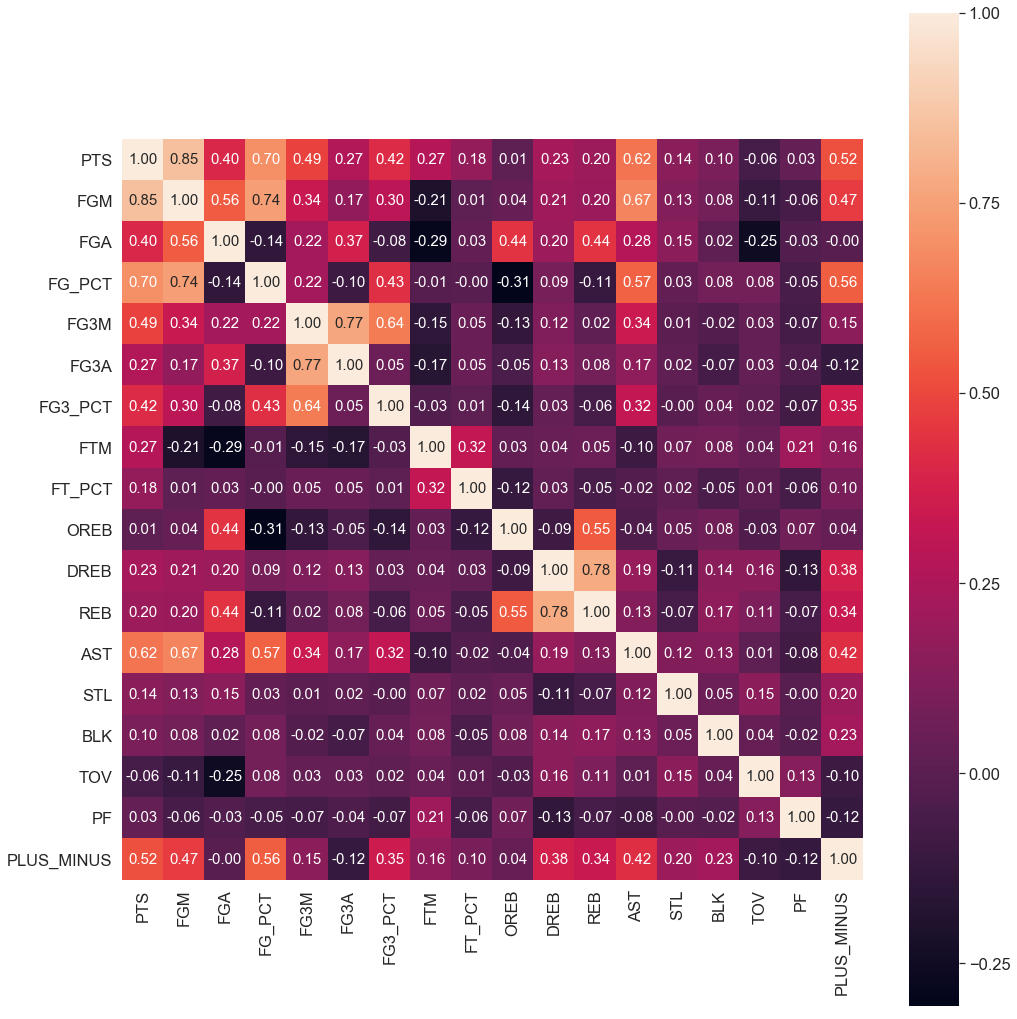

In [8]:
## Visualizing the important characteristics of a dataset

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,15))
cols = ['PTS','FGM','FGA','FG_PCT','FG3M',
    'FG3A','FG3_PCT','FTM','FT_PCT',
    'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PLUS_MINUS']

cm = np.corrcoef(train[cols].values.T) # Corr Matrix
sns.set(font_scale=1.5)
hm = sns.heatmap(cm
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 15}
                 ,yticklabels=cols
                 ,xticklabels=cols)

plt.tight_layout()
# plt.savefig('heatmap.jpg') # 必須要放在 plt.show() 之前
plt.show()

# 特徵工程

In [9]:
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
1,22020,1610612747,LAL,Los Angeles Lakers,0022000131,2021-01-08,LAL vs. CHI,W,240,117,...,42,21,3,8,15,15,0.6,2,True,CHI
2,22020,1610612747,LAL,Los Angeles Lakers,0022000121,2021-01-07,LAL vs. SAS,L,240,109,...,48,21,2,4,13,20,-4.2,2,True,SAS
3,22020,1610612747,LAL,Los Angeles Lakers,0022000103,2021-01-05,LAL @ MEM,W,239,94,...,52,24,7,8,17,14,2.2,2,False,MEM
4,22020,1610612747,LAL,Los Angeles Lakers,0022000087,2021-01-03,LAL @ MEM,W,239,108,...,49,24,9,5,10,15,8.8,2,False,MEM
5,22020,1610612747,LAL,Los Angeles Lakers,0022000075,2021-01-01,LAL @ SAS,W,239,109,...,58,27,8,7,13,20,6.0,2,False,SAS
6,22020,1610612747,LAL,Los Angeles Lakers,0022000060,2020-12-30,LAL @ SAS,W,239,121,...,47,25,4,3,17,24,14.0,2,False,SAS
7,22020,1610612747,LAL,Los Angeles Lakers,0022000045,2020-12-28,LAL vs. POR,L,240,107,...,41,20,6,5,14,14,-8.0,2,True,POR
8,22020,1610612747,LAL,Los Angeles Lakers,0022000040,2020-12-27,LAL vs. MIN,W,242,127,...,46,32,6,14,17,19,36.0,2,True,MIN
9,22020,1610612747,LAL,Los Angeles Lakers,0022000008,2020-12-25,LAL vs. DAL,W,237,138,...,53,33,9,4,16,23,23.8,2,True,DAL
10,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,109,...,45,22,4,2,19,20,-7.6,2,True,LAC


In [10]:
#主客場欄位改成0,1
train['Home'] = train['Home'].astype(int)
train['Home']

1       1
2       1
3       0
4       0
5       0
6       0
7       1
8       1
9       1
10      1
11      0
12      0
13      1
14      1
15      0
16      1
17      0
18      0
19      1
20      1
21      1
22      0
23      0
24      1
25      1
26      1
27      0
28      0
29      1
30      1
       ..
2324    1
2325    0
2326    0
2327    0
2328    0
2329    1
2330    1
2331    0
2332    1
2333    1
2334    0
2335    1
2336    1
2337    0
2338    0
2339    0
2340    1
2341    1
2342    1
2343    0
2344    0
2345    1
2346    0
2347    0
2348    1
2349    0
2350    0
2351    0
2352    1
2353    1
Name: Home, Length: 2331, dtype: int32

In [11]:
train["Player"].unique()

array(['CHI', 'SAS', 'MEM', 'POR', 'MIN', 'DAL', 'LAC', 'PHX', 'MIA',
       'DEN', 'HOU', 'SAC', 'IND', 'OKC', 'UTA', 'TOR', 'WAS', 'ORL',
       'BKN', 'MIL', 'PHI', 'NOP', 'GSW', 'BOS', 'NYK', 'CLE', 'DET',
       'ATL', 'CHA', 'MAC', 'NOH', 'NJN', 'BAR', 'SEA', 'NOK', 'CHH',
       'VAN'], dtype=object)

In [12]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
train ['Player'] = train ['Player'].map(Player_mapping)


In [13]:
#將"WL"做編碼
size_mapping = {'W': 1,'L': 0}
train['WL'] = train['WL'].map(size_mapping) 

In [14]:
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
1,22020,1610612747,LAL,Los Angeles Lakers,0022000131,2021-01-08,LAL vs. CHI,1,240,117,...,42,21,3,8,15,15,0.6,2,1,23.0
2,22020,1610612747,LAL,Los Angeles Lakers,0022000121,2021-01-07,LAL vs. SAS,0,240,109,...,48,21,2,4,13,20,-4.2,2,1,24.0
3,22020,1610612747,LAL,Los Angeles Lakers,0022000103,2021-01-05,LAL @ MEM,1,239,94,...,52,24,7,8,17,14,2.2,2,0,2.0
4,22020,1610612747,LAL,Los Angeles Lakers,0022000087,2021-01-03,LAL @ MEM,1,239,108,...,49,24,9,5,10,15,8.8,2,0,2.0
5,22020,1610612747,LAL,Los Angeles Lakers,0022000075,2021-01-01,LAL @ SAS,1,239,109,...,58,27,8,7,13,20,6.0,2,0,24.0
6,22020,1610612747,LAL,Los Angeles Lakers,0022000060,2020-12-30,LAL @ SAS,1,239,121,...,47,25,4,3,17,24,14.0,2,0,24.0
7,22020,1610612747,LAL,Los Angeles Lakers,0022000045,2020-12-28,LAL vs. POR,0,240,107,...,41,20,6,5,14,14,-8.0,2,1,7.0
8,22020,1610612747,LAL,Los Angeles Lakers,0022000040,2020-12-27,LAL vs. MIN,1,242,127,...,46,32,6,14,17,19,36.0,2,1,16.0
9,22020,1610612747,LAL,Los Angeles Lakers,0022000008,2020-12-25,LAL vs. DAL,1,237,138,...,53,33,9,4,16,23,23.8,2,1,26.0
10,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,0,240,109,...,45,22,4,2,19,20,-7.6,2,1,17.0


In [15]:
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
36,22019,1610612747,LAL,Los Angeles Lakers,0021901310,2020-08-13,LAL vs. SAC,L,241,122,...,47,29,6,1,17,18,-14.0,2,True,SAC
37,22019,1610612747,LAL,Los Angeles Lakers,0021901296,2020-08-10,LAL vs. DEN,W,240,124,...,32,28,8,4,10,18,3.0,2,True,DEN
38,22019,1610612747,LAL,Los Angeles Lakers,0021901282,2020-08-08,LAL @ IND,L,240,111,...,44,20,13,6,15,16,-5.0,2,False,IND
39,22019,1610612747,LAL,Los Angeles Lakers,0021901273,2020-08-06,LAL @ HOU,L,240,97,...,48,18,11,6,24,20,-16.0,2,False,HOU
40,22019,1610612747,LAL,Los Angeles Lakers,0021901265,2020-08-05,LAL vs. OKC,L,240,86,...,46,17,7,3,11,24,-19.0,2,True,OKC
41,22019,1610612747,LAL,Los Angeles Lakers,0021901255,2020-08-03,LAL @ UTA,W,241,116,...,38,23,12,3,14,24,8.0,2,False,UTA
42,22019,1610612747,LAL,Los Angeles Lakers,0021901243,2020-08-01,LAL @ TOR,L,240,92,...,40,17,8,12,17,25,-15.0,2,False,TOR
43,22019,1610612747,LAL,Los Angeles Lakers,0021901232,2020-07-30,LAL vs. LAC,W,239,103,...,45,21,6,3,16,27,2.0,2,True,LAC
47,22019,1610612747,LAL,Los Angeles Lakers,0021900968,2020-03-10,LAL vs. BKN,L,241,102,...,46,24,7,4,14,22,-3.2,2,True,BKN
48,22019,1610612747,LAL,Los Angeles Lakers,0021900948,2020-03-08,LAL @ LAC,W,241,112,...,45,22,8,7,12,28,9.0,2,False,LAC


In [16]:
#主客場欄位改成0,1
test['Home'] = test['Home'].astype(int)
test['Home']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


36     1
37     1
38     0
39     0
40     1
41     0
42     0
43     1
47     1
48     0
49     1
50     1
51     0
52     0
53     0
54     1
55     1
56     1
57     0
58     1
59     0
60     1
61     1
62     0
63     1
64     0
65     0
66     0
67     0
68     0
      ..
88     0
89     0
90     1
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     1
99     1
100    0
101    1
102    1
103    0
104    0
105    0
106    1
107    1
108    1
109    0
116    0
117    0
118    1
119    1
120    0
121    0
122    0
123    1
Name: Home, Length: 79, dtype: int32

In [17]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
test ['Player'] = test ['Player'].map(Player_mapping)
test


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
36,22019,1610612747,LAL,Los Angeles Lakers,0021901310,2020-08-13,LAL vs. SAC,L,241,122,...,47,29,6,1,17,18,-14.0,2,1,29.0
37,22019,1610612747,LAL,Los Angeles Lakers,0021901296,2020-08-10,LAL vs. DEN,W,240,124,...,32,28,8,4,10,18,3.0,2,1,27.0
38,22019,1610612747,LAL,Los Angeles Lakers,0021901282,2020-08-08,LAL @ IND,L,240,111,...,44,20,13,6,15,16,-5.0,2,0,12.0
39,22019,1610612747,LAL,Los Angeles Lakers,0021901273,2020-08-06,LAL @ HOU,L,240,97,...,48,18,11,6,24,20,-16.0,2,0,9.0
40,22019,1610612747,LAL,Los Angeles Lakers,0021901265,2020-08-05,LAL vs. OKC,L,240,86,...,46,17,7,3,11,24,-19.0,2,1,11.0
41,22019,1610612747,LAL,Los Angeles Lakers,0021901255,2020-08-03,LAL @ UTA,W,241,116,...,38,23,12,3,14,24,8.0,2,0,13.0
42,22019,1610612747,LAL,Los Angeles Lakers,0021901243,2020-08-01,LAL @ TOR,L,240,92,...,40,17,8,12,17,25,-15.0,2,0,4.0
43,22019,1610612747,LAL,Los Angeles Lakers,0021901232,2020-07-30,LAL vs. LAC,W,239,103,...,45,21,6,3,16,27,2.0,2,1,17.0
47,22019,1610612747,LAL,Los Angeles Lakers,0021900968,2020-03-10,LAL vs. BKN,L,241,102,...,46,24,7,4,14,22,-3.2,2,1,5.0
48,22019,1610612747,LAL,Los Angeles Lakers,0021900948,2020-03-08,LAL @ LAC,W,241,112,...,45,22,8,7,12,28,9.0,2,0,17.0


In [18]:
# 將"WL"做編碼
WL_mapping = {'W': 1,'L': 0}

test['WL'] = test['WL'].map(WL_mapping) 
test

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
36,22019,1610612747,LAL,Los Angeles Lakers,0021901310,2020-08-13,LAL vs. SAC,0,241,122,...,47,29,6,1,17,18,-14.0,2,1,29.0
37,22019,1610612747,LAL,Los Angeles Lakers,0021901296,2020-08-10,LAL vs. DEN,1,240,124,...,32,28,8,4,10,18,3.0,2,1,27.0
38,22019,1610612747,LAL,Los Angeles Lakers,0021901282,2020-08-08,LAL @ IND,0,240,111,...,44,20,13,6,15,16,-5.0,2,0,12.0
39,22019,1610612747,LAL,Los Angeles Lakers,0021901273,2020-08-06,LAL @ HOU,0,240,97,...,48,18,11,6,24,20,-16.0,2,0,9.0
40,22019,1610612747,LAL,Los Angeles Lakers,0021901265,2020-08-05,LAL vs. OKC,0,240,86,...,46,17,7,3,11,24,-19.0,2,1,11.0
41,22019,1610612747,LAL,Los Angeles Lakers,0021901255,2020-08-03,LAL @ UTA,1,241,116,...,38,23,12,3,14,24,8.0,2,0,13.0
42,22019,1610612747,LAL,Los Angeles Lakers,0021901243,2020-08-01,LAL @ TOR,0,240,92,...,40,17,8,12,17,25,-15.0,2,0,4.0
43,22019,1610612747,LAL,Los Angeles Lakers,0021901232,2020-07-30,LAL vs. LAC,1,239,103,...,45,21,6,3,16,27,2.0,2,1,17.0
47,22019,1610612747,LAL,Los Angeles Lakers,0021900968,2020-03-10,LAL vs. BKN,0,241,102,...,46,24,7,4,14,22,-3.2,2,1,5.0
48,22019,1610612747,LAL,Los Angeles Lakers,0021900948,2020-03-08,LAL @ LAC,1,241,112,...,45,22,8,7,12,28,9.0,2,0,17.0


In [19]:
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,season,Home,Player
36,22019,1610612747,LAL,Los Angeles Lakers,0021901310,2020-08-13,LAL vs. SAC,0,241,122,...,47,29,6,1,17,18,-14.0,2,1,29.0
37,22019,1610612747,LAL,Los Angeles Lakers,0021901296,2020-08-10,LAL vs. DEN,1,240,124,...,32,28,8,4,10,18,3.0,2,1,27.0
38,22019,1610612747,LAL,Los Angeles Lakers,0021901282,2020-08-08,LAL @ IND,0,240,111,...,44,20,13,6,15,16,-5.0,2,0,12.0
39,22019,1610612747,LAL,Los Angeles Lakers,0021901273,2020-08-06,LAL @ HOU,0,240,97,...,48,18,11,6,24,20,-16.0,2,0,9.0
40,22019,1610612747,LAL,Los Angeles Lakers,0021901265,2020-08-05,LAL vs. OKC,0,240,86,...,46,17,7,3,11,24,-19.0,2,1,11.0
41,22019,1610612747,LAL,Los Angeles Lakers,0021901255,2020-08-03,LAL @ UTA,1,241,116,...,38,23,12,3,14,24,8.0,2,0,13.0
42,22019,1610612747,LAL,Los Angeles Lakers,0021901243,2020-08-01,LAL @ TOR,0,240,92,...,40,17,8,12,17,25,-15.0,2,0,4.0
43,22019,1610612747,LAL,Los Angeles Lakers,0021901232,2020-07-30,LAL vs. LAC,1,239,103,...,45,21,6,3,16,27,2.0,2,1,17.0
47,22019,1610612747,LAL,Los Angeles Lakers,0021900968,2020-03-10,LAL vs. BKN,0,241,102,...,46,24,7,4,14,22,-3.2,2,1,5.0
48,22019,1610612747,LAL,Los Angeles Lakers,0021900948,2020-03-08,LAL @ LAC,1,241,112,...,45,22,8,7,12,28,9.0,2,0,17.0


# 特徵篩選

In [20]:
x_train = train.iloc[:,10:-10]
y_train = train.iloc[:,7]
x_train,y_train

(      FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB
 1      41   81   0.506    12    29    0.414   23   27   0.852    10    32
 2      43   86   0.500    10    30    0.333   13   21   0.619     9    39
 3      38   87   0.437     9    31    0.290    9   11   0.818     9    43
 4      41   89   0.461    12    35    0.343   14   19   0.737    12    37
 5      41  101   0.406    14    33    0.424   13   16   0.813    16    42
 6      46   82   0.561    14    26    0.538   15   20   0.750     7    40
 7      41   87   0.471    10    27    0.370   15   18   0.833     6    35
 8      50   90   0.556    13    35    0.371   14   18   0.778     5    41
 9      51   91   0.560    19    39    0.487   17   24   0.708    17    36
 10     38   81   0.469     9    29    0.310   24   31   0.774     8    37
 11     41   81   0.506    16    30    0.533   16   27   0.593     3    30
 12     39   82   0.476    10    25    0.400   24   32   0.750     8    39
 13     46   81   0.568  

In [21]:
x_test = test.iloc[:,10:-10]
y_test = test.iloc[:,7]
x_test,y_test

(     FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB
 36    48   98   0.490    15    35    0.429   11   15   0.733    15    32
 37    44   81   0.543    14    29    0.483   22   32   0.688    14    18
 38    42  100   0.420    13    39    0.333   14   19   0.737    15    29
 39    35   77   0.455     2    19    0.105   25   36   0.694    12    36
 40    31   88   0.352     5    37    0.135   19   29   0.655    10    36
 41    41   82   0.500     9    26    0.346   25   31   0.806     4    34
 42    29   82   0.354    10    40    0.250   24   33   0.727     8    32
 43    32   82   0.390    11    36    0.306   28   37   0.757    11    34
 47    40   87   0.460    15    40    0.375    7   12   0.583     8    38
 48    39   87   0.448    10    35    0.286   24   28   0.857     9    36
 49    38   91   0.418     6    32    0.188   31   38   0.816    10    42
 50    46   86   0.535    13    33    0.394   15   18   0.833    10    33
 51    50   97   0.515    13    35    

In [22]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape,

((2331, 11), (2331,), (79, 11), (79,))

# 建立模型1

In [23]:
# LogisticRegression
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(x_train,y_train)
clf.coef_, clf.intercept_

(array([[ 0.32711131, -0.19254181, -1.23040184,  0.2485244 , -0.13924799,
         -0.09743705,  0.18496155, -0.08918373, -1.34919132,  0.18812861,
          0.19022515]]), array([-2.73812294]))

In [24]:
print('coef', clf.coef_)
print('intercept', clf.intercept_)

coef [[ 0.32711131 -0.19254181 -1.23040184  0.2485244  -0.13924799 -0.09743705
   0.18496155 -0.08918373 -1.34919132  0.18812861  0.19022515]]
intercept [-2.73812294]


In [25]:
# k-fold CV 
from sklearn.model_selection import cross_val_score
clf = linear_model.LogisticRegression()
clf.fit(x_train,y_train)
scores = cross_val_score(clf ,x_train ,y_train, cv=5) #, scoring='accuracy'
scores
# check_estimator(linear_model.LogisticRegression())

array([0.74946467, 0.751606  , 0.78969957, 0.75536481, 0.84731183])

In [26]:
print(scores.mean())

0.7786893738901912


In [27]:
clf.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
clf.score(x_test,y_test)

0.759493670886076

# 建立模型2

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
scores = cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.66167024 0.72162741 0.74248927 0.72961373 0.76989247]
0.725058624389948


In [31]:
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.8271128271128271, 0.8607594936708861)

In [32]:
# Confusion matrix    
predicted_labels = clf.predict(x_test)
true_labels = y_test

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels, predicted_labels)

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

             precision    recall  f1-score   support

          0       0.58      0.79      0.67        24
          1       0.89      0.75      0.81        55

avg / total       0.80      0.76      0.77        79

Confusion matrix
[[19  5]
 [14 41]]


In [33]:
from sklearn import datasets, neighbors, linear_model
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression() # 採用default

print('KNN score: %f' % knn.fit(x_train, y_train).score(x_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(x_train, y_train).score(x_test, y_test))

KNN score: 0.860759
LogisticRegression score: 0.759494


# 建立模型3

In [34]:
#導入套件
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

#設定xgbc模型參數
xgbc = XGBClassifier(n_estimators=2
                    ,max_depth=6) #2/3/4/5/6/7/8
print(xgbc)
#用分割好的訓練資料建立模型
xgbc.fit(x_train, y_train)
print(xgbc.score(x_train, y_train),xgbc.score(x_test, y_test))



XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=6,
       min_child_weight=None, missing=nan, monotone_constraints=None,
       n_estimators=2, n_jobs=None, num_parallel_tree=None,
       objective='binary:logistic', random_state=None, reg_alpha=None,
       reg_lambda=None, scale_pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None)
0.8309738309738309 0.8481012658227848


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
# kfold- cross validataion
kfold =KFold(n_splits=5, shuffle=True)
Kf_cv_scores = cross_val_score(xgbc,x_train, y_train,cv=kfold)
print(Kf_cv_scores)
print('mean of K fold=',Kf_cv_scores.mean())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

[0.74732334 0.76180258 0.75321888 0.78540773 0.78969957]
mean of K fold= 0.7674904191671799


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
#test data 的 預測值
y_pred = xgbc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[23  1]
 [ 7 48]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
# Confusion matrix    
predicted_labels = y_pred
true_labels = y_test

from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))


             precision    recall  f1-score   support

          0       0.77      0.96      0.85        24
          1       0.98      0.87      0.92        55

avg / total       0.91      0.90      0.90        79



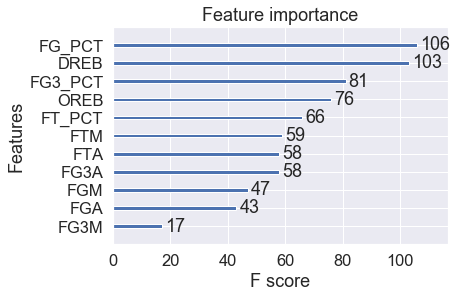

In [39]:
# 特徵重要性
xgbc.feature_importances_
# 特徵重要性圖
import xgboost
xgboost.plot_importance(xgbc)

In [40]:
xgbc.predict_proba(x_test)

array([[0.55072355, 0.44927648],
       [0.16252697, 0.83747303],
       [0.8180282 , 0.18197182],
       [0.5541005 , 0.4458995 ],
       [0.9649139 , 0.03508611],
       [0.16098249, 0.8390175 ],
       [0.977998  , 0.02200196],
       [0.57305235, 0.42694765],
       [0.87393   , 0.12607001],
       [0.31207   , 0.68793   ],
       [0.17844862, 0.8215514 ],
       [0.05990982, 0.9400902 ],
       [0.40319306, 0.59680694],
       [0.9431618 , 0.05683819],
       [0.24536812, 0.7546319 ],
       [0.33051652, 0.6694835 ],
       [0.19361222, 0.8063878 ],
       [0.07683516, 0.92316484],
       [0.12204456, 0.87795544],
       [0.04593956, 0.95406044],
       [0.01998478, 0.9800152 ],
       [0.8156177 , 0.1843823 ],
       [0.00954795, 0.99045205],
       [0.08309507, 0.9169049 ],
       [0.28057504, 0.71942496],
       [0.9324241 , 0.06757587],
       [0.03500301, 0.964997  ],
       [0.4499973 , 0.5500027 ],
       [0.9251806 , 0.07481941],
       [0.23114008, 0.7688599 ],
       [0.

In [41]:
# preict dataframe
predict_y = pd.DataFrame(y_pred,columns=['predict_y'])
new = pd.concat([x_test.reset_index(),pd.DataFrame(xgbc.predict_proba(x_test),columns=['prob_0','prob_1']),predict_y], axis=1)
new['true_y'] = y_test.reset_index().iloc[:,1]
new

,index,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,prob_0,prob_1,predict_y,true_y
0,36,48,98,0.490,15,35,0.429,11,15,0.733,15,32,0.550724,0.449276,0,0
1,37,44,81,0.543,14,29,0.483,22,32,0.688,14,18,0.162527,0.837473,1,1
2,38,42,100,0.420,13,39,0.333,14,19,0.737,15,29,0.818028,0.181972,0,0
3,39,35,77,0.455,2,19,0.105,25,36,0.694,12,36,0.554101,0.445899,0,0
4,40,31,88,0.352,5,37,0.135,19,29,0.655,10,36,0.964914,0.035086,0,0
5,41,41,82,0.500,9,26,0.346,25,31,0.806,4,34,0.160982,0.839018,1,1
6,42,29,82,0.354,10,40,0.250,24,33,0.727,8,32,0.977998,0.022002,0,0
7,43,32,82,0.390,11,36,0.306,28,37,0.757,11,34,0.573052,0.426948,0,1
8,47,40,87,0.460,15,40,0.375,7,12,0.583,8,38,0.873930,0.126070,0,0
9,48,39,87,0.448,10,35,0.286,24,28,0.857,9,36,0.312070,0.687930,1,1


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

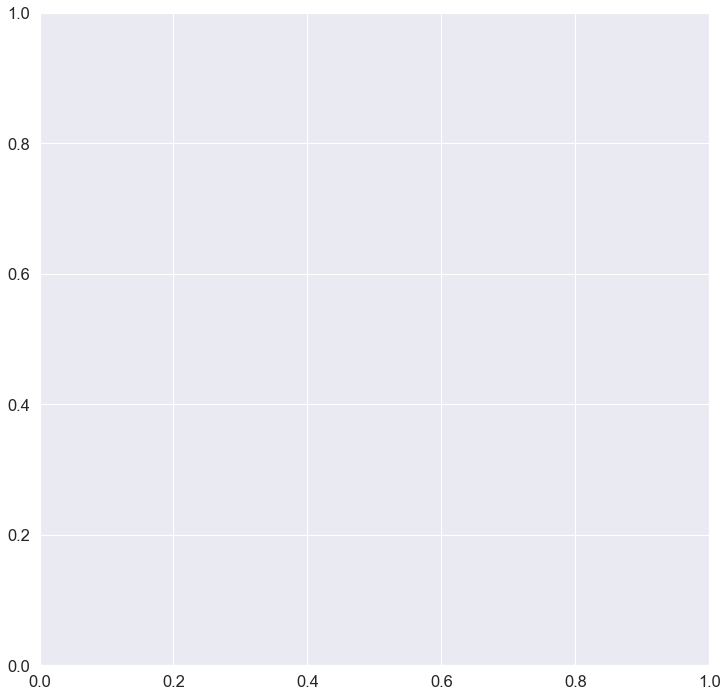

In [42]:
import graphviz
#設置Graphviz路徑
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 12) #設定之後所有圖片大小

#XGB樹模型輸出
from xgboost import plot_tree
plot_tree(xgbc,num_trees=0)
plot_tree(xgbc,num_trees=1)
plt.show()
for i in range(0,2):
    plot_tree(xgbc,num_trees=i)
    plt.show()